# SVM

+ Show sklearn calls
+ Example of weighted features
+ Visualizing decision function
+ Calculating featur eimportance using linear svm

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')




In [59]:
# getdata
import pandas as pd
df=pd.read_csv('../datasets/CAD-PTSDData.csv',index_col=0)
y=df.iloc[:,0]
X=df.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_train.shape

(212,)

In [60]:
clf = svm.SVC(probability=True,class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (y_test.shape[0],(y_test != y_pred).sum()))
acc=clf.score(X_test,y_test)
y_pred=clf.predict_proba(X_test)
y_pred_insample=clf.predict_proba(X_train)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
fpr_insample, tpr_insample, thresholds_insample = metrics.roc_curve(y_train,y_pred_insample[:,1], pos_label=1)
auc=metrics.auc(fpr, tpr)
auc_insample=metrics.auc(fpr_insample, tpr_insample)

print('Accuracy: ',acc,'AUC oos: ',auc,'AUC in sample: ',auc_insample)

Number of mislabeled points out of a total 92 points : 17
Accuracy:  0.8152173913043478 AUC oos:  0.8444444444444444 AUC in sample:  0.9838262988811344


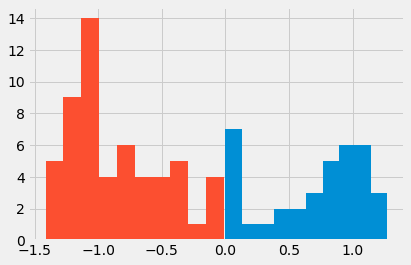

In [61]:
# histogram of distance to seprating hyperplane
d=clf.decision_function(X_test)
plt.hist(d[d>0])
plt.hist(d[d<0])
sample_sort=np.argsort(np.fabs(d))

# Feature importance calculation using a linear SVM and the coeff attribute

In [62]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()
    return imp, names

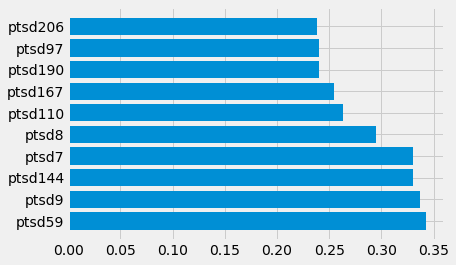

In [63]:
# whatever your features are called
feature_names = X.columns

clf__ = svm.SVC(kernel='linear')
clf__.fit(X_train, y_train)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
imp, names=f_importances(abs(clf__.coef_[0]), feature_names, top=10)
imps=[int(x.replace('ptsd','')) for x in names[-10:]]

In [64]:
sample_weight_constant = np.ones(len(X_train))
sample_weight = np.ones(len(X_train))
# and bigger weights to some outliers
sample_weight[sample_sort[-5:]] *= 10

# fit the model
clf_weights = svm.SVC(probability=True,class_weight='balanced')
clf_weights.fit(X_train, y_train, sample_weight=sample_weight)

y_pred = clf_weights.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (y_test.shape[0],(y_test != y_pred).sum()))
acc=clf_weights.score(X_test,y_test)
y_pred=clf_weights.predict_proba(X_test)
y_pred_insample=clf_weights.predict_proba(X_train)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
fpr_insample, tpr_insample, thresholds_insample = metrics.roc_curve(y_train,y_pred_insample[:,1], pos_label=1)
auc=metrics.auc(fpr, tpr)
auc_insample=metrics.auc(fpr_insample, tpr_insample)

print('Accuracy: ',acc,'AUC oos: ',auc,'AUC in sample: ',auc_insample)

Number of mislabeled points out of a total 92 points : 20
Accuracy:  0.782608695652174 AUC oos:  0.8615384615384616 AUC in sample:  0.9903622465935528


(array([ 3., 13.,  8.,  4.,  4.,  6.,  3.,  6.,  2.,  4.]),
 array([-1.4715515 , -1.32930655, -1.18706161, -1.04481666, -0.90257171,
        -0.76032677, -0.61808182, -0.47583687, -0.33359193, -0.19134698,
        -0.04910203]),
 <a list of 10 Patch objects>)

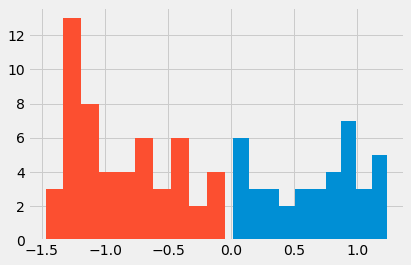

In [65]:
# histogram of distance to seprating hyperplane
d=clf_weights.decision_function(X_test)
plt.hist(d[d>0])
plt.hist(d[d<0])

In [66]:
def plot_decision_function(X_,y_,classifier, sample_weight, axis, title):
    '''
    Visualizing the decision function
    '''
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(0, 6, 50), np.linspace(0, 6, 50))
    
    X_sim = np.c_[xx.ravel(), yy.ravel()]
    X_sim = np.c_[X_sim, np.random.randint(0,6,size=(2500,209))]
    
    Z = classifier.decision_function(X_sim)
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, levels=4,alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(X_[:, 0], X_[:, 1], c=y_, s=60 * sample_weight, alpha=0.9)
    #axis.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100 * sample_weight, alpha=0.9,
    #             cmap=plt.cm.bone)

    axis.axis('off')
    axis.set_title(title)

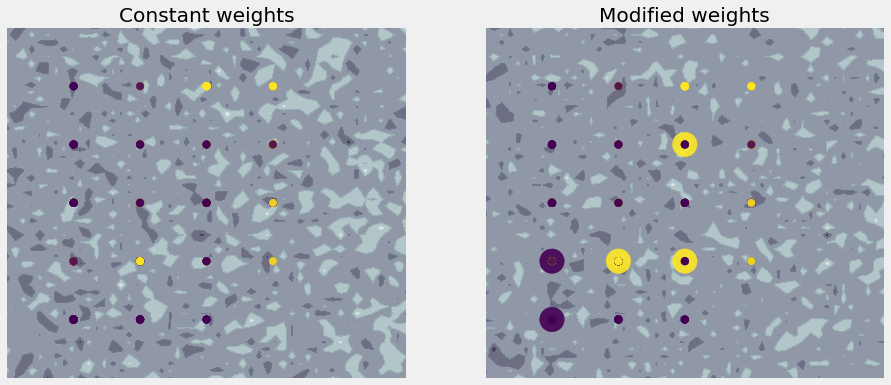

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(X_train.values[:,imps[-2:]],y_train,clf, sample_weight_constant, axes[0],"Constant weights")
plot_decision_function(X_train.values[:,imps[-2:]],y_train,clf_weights, sample_weight, axes[1],"Modified weights")

plt.show()